In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [3]:
# Win
plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [4]:
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


<AxesSubplot:>

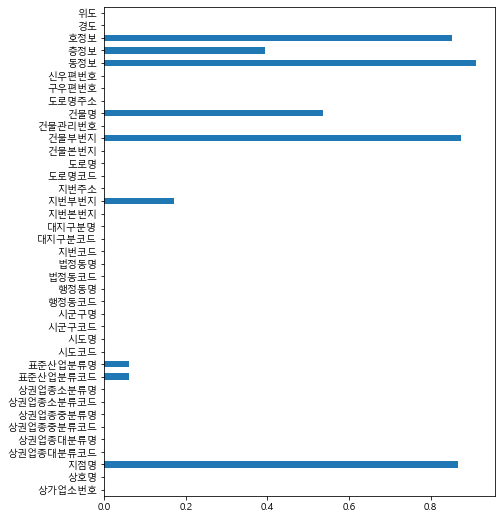

In [5]:
df.isnull().mean().plot.barh(figsize=(7, 9))

In [6]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
print(df.shape)
df = df[columns].copy()
df.shape

(573680, 39)


(573680, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


In [9]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
print(df_seoul.shape)
df_seoul.head()

(407376, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [10]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [11]:
df_seoul["상호명_소문자"].str.extract("((베|배)스킨라빈스|baskinrobbins)")[0].value_counts()

배스킨라빈스           347
베스킨라빈스           117
baskinrobbins      2
Name: 0, dtype: int64

In [12]:
df_seoul["상호명_소문자"].str.extract("(배스킨라빈스|베스킨라빈스|baskinrobbins)")[0].value_counts().sum()

466

In [13]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("(배|베)스킨라빈스|baskinrobbins"), "상호명_소문자"].shape

C:\Users\twitc\AppData\Local\Temp\ipykernel_16440\1512589068.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_seoul.loc[df_seoul["상호명_소문자"].str.contains("(배|베)스킨라빈스|baskinrobbins"), "상호명_소문자"].shape


(466,)

In [14]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
             "상호명_소문자"].shape

(466,)

In [15]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"), "상호명_소문자"].shape

(191,)

In [16]:
df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains(
    '배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(657, 12)

In [20]:
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
          "브랜드명"] = "배스킨라빈스"
df_31[["상호명", "브랜드명"]].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,NaN


In [23]:
df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
          "브랜드명"]
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31["브랜드명"]

76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라빈스
561930    배스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [24]:
df_31["상권업종대분류명"].value_counts()

음식       655
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [25]:
df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [26]:
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])].copy()
df_31.shape

(655, 13)

In [27]:
brand_count = df_31["브랜드명"].value_counts()
brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

<AxesSubplot:>

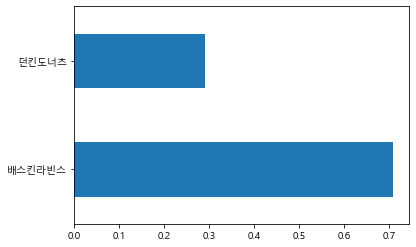

In [28]:
df_31["브랜드명"].value_counts(normalize=True).plot.barh()

In [29]:
brand_count.index

Index(['배스킨라빈스', '던킨도너츠'], dtype='object')

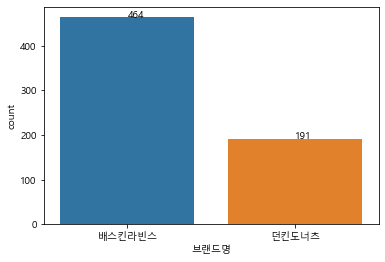

In [30]:
g = sns.countplot(data=df_31, x="브랜드명")

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

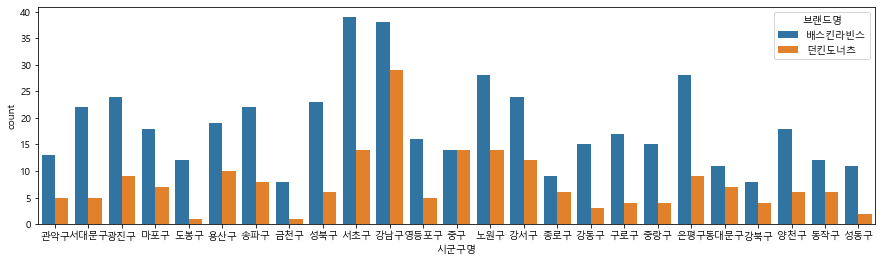

In [31]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

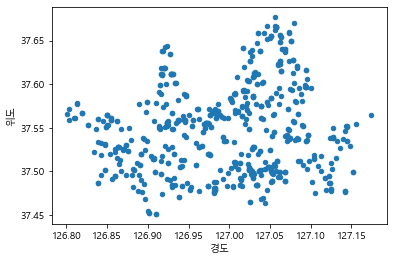

In [32]:
df_31[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

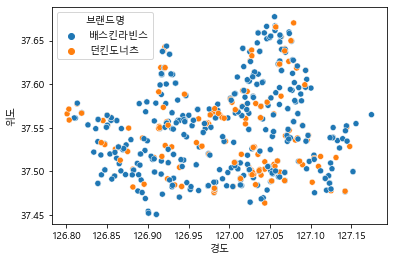

In [33]:
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

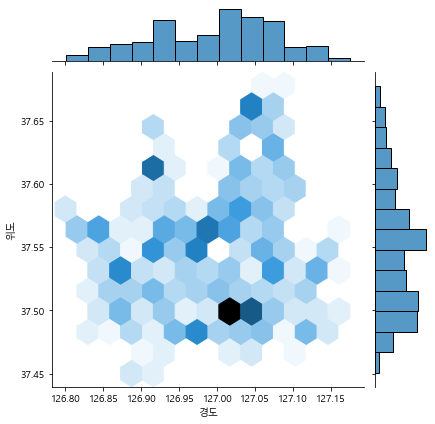

In [34]:
sns.jointplot(data=df_31, x="경도", y="위도", kind="hex")

In [35]:
lat = df_31["위도"].mean()
long = df_31["경도"].mean()
lat, long

(37.548567678569086, 126.99419527148791)

In [39]:
m = folium.Map([lat, long])
# 127.039032	37.495593
folium.Marker(
    [37.495593, 127.039032], 
    popup='<i>던킨도너츠</i>', 
    tooltip="던킨도너츠").add_to(m)
m

In [40]:
df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,
             13042,  13925,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=655)

In [51]:
m = folium.Map([lat, long])

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + ' - ' + df_31.loc[i, "도로명주소"] 
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
        
    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f"<i>{title}</i>",
        tooltip=title).add_to(m)
m

In [50]:
m = folium.Map([lat, long])
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + ' - ' + df_31.loc[i, "도로명주소"] 
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
        
    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f"<i>{title}</i>",
        tooltip=title).add_to(marker_cluster)
m